In [51]:
%pylab inline
import gc
import numpy as np
import fitsio
import astropy.io.fits as pyfits
import numpy.lib.recfunctions as rfn
import astropy.table as astTable

import fpfs
from fpfs import fpfsBase

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd wrkDir/FPFS2/sim

/lustre/work/xiangchong.li/work/FPFS2/sim


In [3]:
pltDir='plot/smallcat/'
if not os.path.isdir(pltDir):
    os.mkdir(pltDir)

In [65]:
ngrid       =  64
rcut         =   16
beg         =   ngrid//2-rcut
end         =   beg+2*rcut
img=pyfits.getdata('small0_psf60/image-0-g1-0000.fits')[beg:end,beg:end]
noiAll    =   pyfits.getdata('noise/noi0000.fits')
noiList   =   np.stack([noiAll[i*ngrid+beg:i*ngrid+end,j*ngrid+beg:j*ngrid+end] for i in range(100) for j in range(100)])

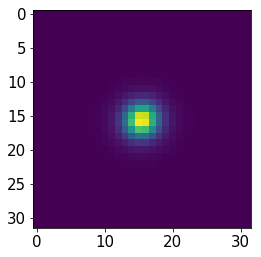

In [57]:
plt.imshow(img)

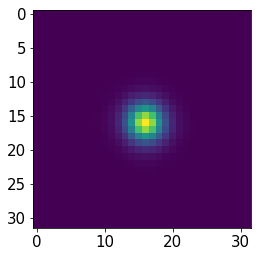

In [59]:
power=fpfs.imgutil.getFouPow(img)
plt.imshow(power)
pyfits.writeto('a.fits',power)

In [8]:
vdir='outSmall0-var7em3'
ngroup=16
igroup=0
C=2000.
noiRev=False
g1p=0.;g1m=0.
downp=0.;downm=0.
for ifield in range(1000):
    fname1=os.path.join(vdir,'psf60/fpfs-cut16-%04d-g1-2222.fits' %(ifield))
    moments1=pyfits.getdata(fname1)
    elli1=fpfsBase.fpfsM2E(moments1,C,rev=noiRev)
    g1p+=np.sum(elli1['fpfs_e1'])
    downp+=np.sum(elli1['fpfs_RE'])

    fname2=os.path.join(vdir,'psf60/fpfs-cut16-%04d-g1-0000.fits' %(ifield))
    moments2=pyfits.getdata(fname2)
    elli2=fpfsBase.fpfsM2E(moments2,C,rev=noiRev)
    g1m+=np.sum(elli2['fpfs_e1'])
    downm+=np.sum(elli2['fpfs_RE'])
    del elli1,elli2,moments1,moments2
    gc.collect()
print((g1p-g1m)/(downm+downp)*2./0.04-1)
print((g1p+g1m)/(downm+downp))

-0.08234059337404942
4.033060196408718e-05


In [26]:
vdir='outSmall2-var7em3'
ngroup=16
igroup=0
C=2000.
noiRev=True
g1p=0.;g1m=0.
downp=0.;downm=0.
for ifield in range(1000):
    fname1=os.path.join(vdir,'psf60/fpfs-cut16-%04d-g1-2222.fits' %(ifield))
    moments1=pyfits.getdata(fname1)
    elli1=fpfsBase.fpfsM2E(moments1,C,rev=noiRev)
    g1p+=np.sum(elli1['fpfs_e1'])
    downp+=np.sum(elli1['fpfs_RE'])

    fname2=os.path.join(vdir,'psf60/fpfs-cut16-%04d-g1-0000.fits' %(ifield))
    moments2=pyfits.getdata(fname2)
    elli2=fpfsBase.fpfsM2E(moments2,C,rev=noiRev)
    g1m+=np.sum(elli2['fpfs_e1'])
    downm+=np.sum(elli2['fpfs_RE'])
    del elli1,elli2,moments1,moments2
    gc.collect()
print((g1p-g1m)/(downm+downp)*2./0.04-1)
print((g1p+g1m)/(downm+downp))
print(downm/1e7)
print(g1m/1e7)

8.90564529449911e-05
-0.0001807748027638628
-0.06547835402345302
0.0013215183654919584


In [18]:
vdir='outSmall0-var7em3'
ngroup=16
igroup=0
C=2000.
noiRev=False
del allStack
allStack=[]

for ifield in range(100):
    fname1=os.path.join(vdir,'psf60/fpfs-cut16-%04d-g1-2222.fits' %(ifield))
    moments1=pyfits.getdata(fname1)
    weight=moments1['fpfs_M00']+C
    ratio=  moments1['fpfs_N00N00']/weight**2.
    cc1=np.average(moments1['fpfs_N00N22c']/weight**2./(1+ratio))

    fname2=os.path.join(vdir,'psf60/fpfs-cut16-%04d-g1-0000.fits' %(ifield))
    moments2=pyfits.getdata(fname2)
    weight=moments2['fpfs_M00']+C
    ratio=  moments2['fpfs_N00N00']/weight**2.
    cc2=np.average(moments2['fpfs_N00N22c']/weight**2./(1+ratio))
    allStack.append((cc1+cc2)/2.)
    del moments1,moments2,ratio,weight,cc1,cc2
    gc.collect()

In [44]:
fname1=os.path.join(vdir,'psf60/fpfs-cut16-%04d-g1-2222.fits' %(ifield))
moments1=pyfits.getdata(fname1)
weight=moments1['fpfs_M00']+C
ratio=  moments1['fpfs_N00N00']/weight**2.
cc1=moments1['fpfs_N00N22c']/weight**2./(1+ratio)
ee1=moments1['fpfs_M22c']/weight

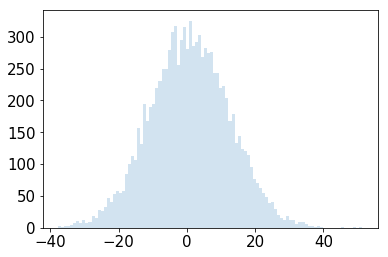

In [49]:
_=plt.hist(cc1*1e5,bins=100,alpha=0.2)

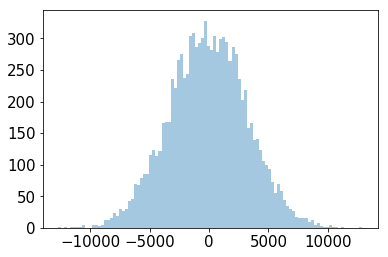

In [50]:
_=plt.hist(ee1*1e5,bins=100,alpha=0.4)


1.2673668635700298e-05


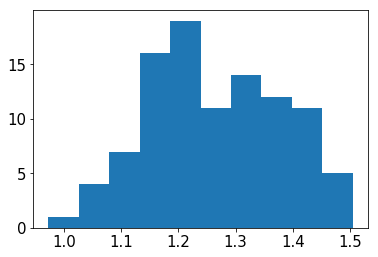

In [22]:
plt.hist(np.array(allStack)*1e5)
print(np.average(allStack))